In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Get the data
df = pd.read_csv('/content/breast-cancer.data', header=None)

In [ ]:
# Header none because there is no proper name for specific column in dataset
df.head()

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [ ]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True) #shuffling to make samples iid

In [ ]:
# shuffling all the values in data so that we can split the data (frac = 1 means for all data)
df = df.sample(frac=1, random_state=42).reset_index(drop = True)

In [ ]:
# Get Train and Test sets
N = df.shape[0]
df_train = df[:int(N*0.8)]
df_test = df[int(N*0.8):]

* Posterior distribution for class $c$ with feature $x$
$$ p( c | x )  = \frac{p(c) p( x | c)}{p(x)} $$
* Here $x =[x_1, ..., x_d]$ and $d$ is the feature size
$$p(x) = p([x_1, \ldots, x_d])$$
* Naive bayes assumption
$$p( x | c) = \prod_{i=1}^d p( x_i | c) $$
* Posterior becomes,
$$p( c | x )  \propto  p(c)  \prod_{i=1}^d p( x_i | c) $$

We need to find Prior probability of classes (ie nonreccurent and recurrent) and likelihood probabilities


# Prior Probability

In [ ]:
N = df_train.shape[0]
prior = dict(df_train[0].value_counts())
prior = dict([(k,v/N) for k,v in prior.items()])

In [ ]:
prior

{'no-recurrence-events': 0.6929824561403509,
 'recurrence-events': 0.30701754385964913}

# Likelihood Estimation

* Since each feature takes discrete values we use the categorical distribution over each variable

* $p(x|c)= \prod_{i=1}^{d}p(x_i| c) $

* Let categorical variable $x_i \in \{a_1, a_2, \ldots, a_{m} \}$ 
$$p(x_i= a_j |c)= \pi_{a_j}^{c}$$

That is $x_i$ is feature and we have k (Here = 9) features. Each features $x_i$ contains different category


$$\sum_{j=1}^{m}  \pi_{a_j}^{c} = 1$$
$$p(x_i|c)= \prod_{j=1}^{m} {\pi_{a_j}^{c}}^{x_i =a_j } $$
* Here $\pi_{a_j}^{c}$ can be estimated using maximum likelihood estimation,
* Lets assume there are $N_c$ samples from class c, then
$$\prod_{k=1}^{N_c} p(x_i^k|c)= \prod_{k=1}^{N_c} \prod_{j=1}^{m} {\pi_{a_j}^{c}}^{x_i^k =a_j }  $$
$$\prod_{k=1}^{N_c} p(x_i^k|c)=   \prod_{j=1}^{m} {\pi_{a_j}^{c}}^{N_{a_j}^{c}} $$

* The negative loglikelihood loss is,
$$ Loss = -1  * {N_{a_j}^{c}}  * \sum_{j=1}^{m} \log{\pi_{a_j}^{c}} $$
* Then do a constrainted loss minimization of the following loss, 
$$ Loss = -1  * {N_{a_j}^{c}}  * \sum_{j=1}^{m} \log{\pi_{a_j}^{c}} + \lambda (\sum_{j=1}^{m}  \pi_{a_j}^{c} -1) $$
* Minimize the above loss function with respect to $\pi_{a_j}^{c}$, then you will get


$$\pi_{a_j}^{c}  = \frac{N_{a_j}^{c}}{N_{c}}$$
* Here $N_{a_j}^{c}$ is the number of times feature $x_i$ takes value of $a_j$ for a sample from class $c$
* Repeat the same procedure for each categorical features

In [ ]:
likeli = {}
for class_i in prior.keys():
    df_class = df_train[df_train[0]==class_i] # values in that set
    N_class = df_class.shape[0]
    likeli[class_i]= {}
    for col in range(1, 10):
        feature_count = dict(df_class[col].value_counts())
        keys = df[col].unique()
        likeli[class_i][col]= dict( [(k, feature_count[k]/N_class)\
            if k in feature_count else (k, 0) for k in keys ] )

In [ ]:
likeli

{'no-recurrence-events': {1: {'40-49': 0.31645569620253167,
   '60-69': 0.1962025316455696,
   '50-59': 0.34177215189873417,
   '30-39': 0.12025316455696203,
   '70-79': 0.0189873417721519,
   '20-29': 0.006329113924050633},
  2: {'premeno': 0.5316455696202531,
   'ge40': 0.44936708860759494,
   'lt40': 0.0189873417721519},
  3: {'20-24': 0.16455696202531644,
   '45-49': 0.012658227848101266,
   '30-34': 0.18354430379746836,
   '40-44': 0.0759493670886076,
   '15-19': 0.08860759493670886,
   '10-14': 0.1518987341772152,
   '50-54': 0.02531645569620253,
   '35-39': 0.06329113924050633,
   '25-29': 0.17088607594936708,
   '0-4': 0.0379746835443038,
   '5-9': 0.02531645569620253},
  4: {'0-2': 0.8291139240506329,
   '24-26': 0,
   '3-5': 0.08860759493670886,
   '6-8': 0.04430379746835443,
   '9-11': 0.012658227848101266,
   '15-17': 0.0189873417721519,
   '12-14': 0.006329113924050633},
  5: {'no': 0.8607594936708861,
   'yes': 0.11392405063291139,
   '?': 0.02531645569620253},
  6: {2: 0

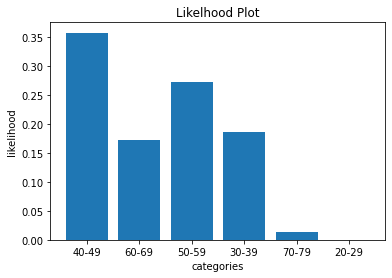

In [ ]:
plt.bar(likeli['recurrence-events'][1].keys(), likeli['recurrence-events'][1].values())
plt.xlabel('categories')
plt.ylabel('likelihood')
plt.title('Likelhood Plot')
plt.show()

# Posterior Inference

$$p( c | x )  \propto  p(c)  \prod_{i=1}^d p( x_i | c) $$
$$\hat{c}= \underset{c}{\mathrm{argmax}}\ p(c | x) $$
To avoid numerical issues due finite precision from the multiplication of values between 0 and 1, we take log probability, so the multiplications become sums as shown below,
$$\hat{c}= \underset{c}{\mathrm{argmax}} \log p(c | x) $$
$$\hat{c}= \underset{c}{\mathrm{argmax}}\ ( \log ( p(c) + \sum \log p(x_i | c) ) $$


In [ ]:
class_names = list(prior.keys())

In [ ]:
class_names

dict_keys(['no-recurrence-events', 'recurrence-events'])

In [ ]:
pos = np.zeros((df_train.shape[0], len(class_names)))
for i in range(df_train.shape[0]):
  for j,cls in enumerate(class_names):
    pos_i = np.log(prior[cls])
    for col in range(1,10):
      pos_i = pos_i + np.log(likeli[cls][col][df_train.loc[i,col]])
    pos[i,j] = pos_i

<ipython-input-26-17c738502a5d>:6: RuntimeWarning: divide by zero encountered in log
  pos_i = pos_i + np.log(likeli[cls][col][df_train.loc[i,col]])


In [ ]:
pos # This shows for all data in train set probability of being in c1 or c2, where c1 and c2 are the classes

array([[ -6.98779408,  -8.90092822],
       [        -inf, -14.01384116],
       [-11.03173701, -11.46236227],
       [ -8.94154365,  -8.88034751],
       [ -9.33005108,  -8.78723848],
       [-12.26800207, -13.99948206],
       [ -8.15326706, -10.91482063],
       [ -8.68910916, -11.54871923],
       [ -9.74631599, -13.96300831],
       [ -7.67831292, -13.09434563],
       [-11.39607483, -10.8037117 ],
       [ -8.08759795, -13.35716766],
       [-11.13047437, -12.18302997],
       [-15.87322296, -11.82749863],
       [ -8.1072942 , -10.48153301],
       [ -9.01300261,  -8.87054351],
       [-20.29508542, -18.7767918 ],
       [-10.33858983, -10.71002621],
       [ -7.48907092,  -9.70354695],
       [ -9.66888969,  -9.25699061],
       [-13.83850661, -12.07990033],
       [-10.22384419,         -inf],
       [ -8.35422661,  -9.46349379],
       [ -8.10929066, -10.86881727],
       [ -9.37654633, -13.33946808],
       [-14.05809897, -10.95441864],
       [-14.56713293, -13.98740791],
 

In [ ]:
df_train.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [ ]:
# Let's encode for each data point the class to which it belongs
df_train.loc[:,'prediction'] = np.array(class_names)[np.argmax(pos, axis=1)]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

In [ ]:
binarizer = LabelEncoder()
binarizer.fit(df[0].values)

LabelEncoder()

In [ ]:
print("Train Accuray=", (df_train[0]==df_train['prediction']).sum()/df_train.shape[0] )

Train Accuray= 0.7456140350877193


In [ ]:
#F1 score calculation for skewed data
print("Train F1-score",  f1_score(binarizer.transform(df_train[0].values), binarizer.transform(df_train['prediction'].values), average='macro' ))

Train F1-score 0.6961397058823529


# Test

In [ ]:
pos_t = np.zeros((df_test.shape[0], len(class_names)) )
for i in range(df_test.shape[0]):
    for j, cls in enumerate(class_names):
        pos_i = np.log(prior[cls])
        for col in range(1, 10):
          pos_i = pos_i + np.log( likeli[cls][col][df_test.iloc[i,col]] )
        pos_t[i, j] = pos_i

<ipython-input-37-b02d2edb9474>:6: RuntimeWarning: divide by zero encountered in log
  pos_i = pos_i + np.log( likeli[cls][col][df_test.iloc[i,col]] )


In [ ]:
df_test.loc[:, 'prediction'] = np.array(class_names)[np.argmax(pos_t, axis=1)]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [ ]:
print("Test Accuray=", (df_test[0]==df_test['prediction']).sum()/df_test.shape[0] )

Test Accuray= 0.7586206896551724


In [ ]:

print("Test F1-score",  f1_score(binarizer.transform(df_test[0].values), binarizer.transform(df_test['prediction'].values), average='macro' ))

Test F1-score 0.6852713178294574
